In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset =pd.read_csv("covid_19_india.csv")

In [2]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year']=dataset['Date'].dt.year

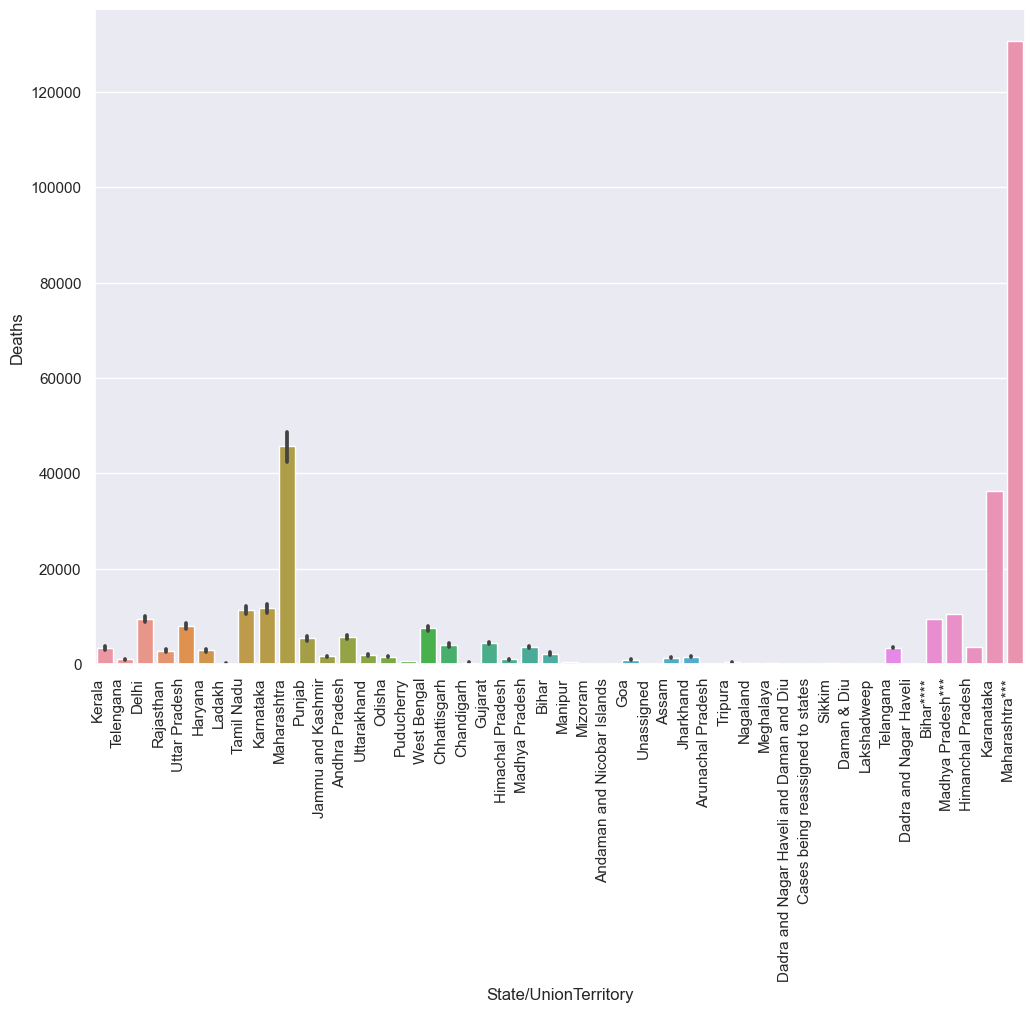

In [12]:
lst = ['Punjab','West Bengal','Rajasthan','Maharashtra','Delhi']
dt2=dataset.loc[dataset['State/UnionTerritory'].isin(lst)]
sns.set(rc = {'figure.figsize':(12.0,8.5)})
abx=sns.barplot(x="State/UnionTerritory",y="Deaths",data=dataset)
plt.setp(abx.get_xticklabels(), rotation=90,ha="right")
print(" ")

In [34]:
dataset.groupby(['State/UnionTerritory'], sort=True)['Deaths'].sum()

State/UnionTerritory
Andaman and Nicobar Islands                    27136
Andhra Pradesh                               2939367
Arunachal Pradesh                              26799
Assam                                         638323
Bihar                                        1093466
Bihar****                                      18881
Cases being reassigned to states                   0
Chandigarh                                    147694
Chhattisgarh                                 2063920
Dadra and Nagar Haveli                             8
Dadra and Nagar Haveli and Daman and Diu        1014
Daman & Diu                                        0
Delhi                                        4943294
Goa                                           447801
Gujarat                                      2219448
Haryana                                      1502799
Himachal Pradesh                              491348
Himanchal Pradesh                               3507
Jammu and Kashmir        

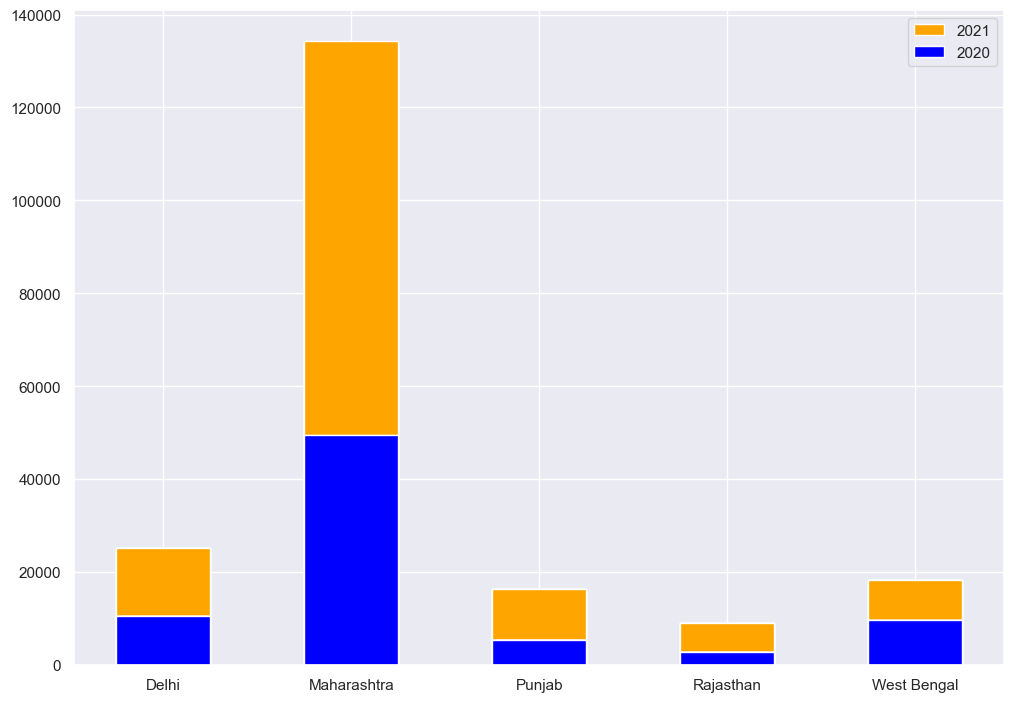

In [42]:
dt3=dt2.loc[dt2['Year']==2020]
dt4=dt2.loc[dt2['Year']==2021]
plt.bar(dt4['State/UnionTerritory'], dt4['Deaths'], width=0.5, color="orange",label="2021")
plt.bar(dt3['State/UnionTerritory'], dt3['Deaths'], width=0.5, color="blue",label="2020")
plt.legend()

<Axes: xlabel='Date', ylabel='Confirmed'>

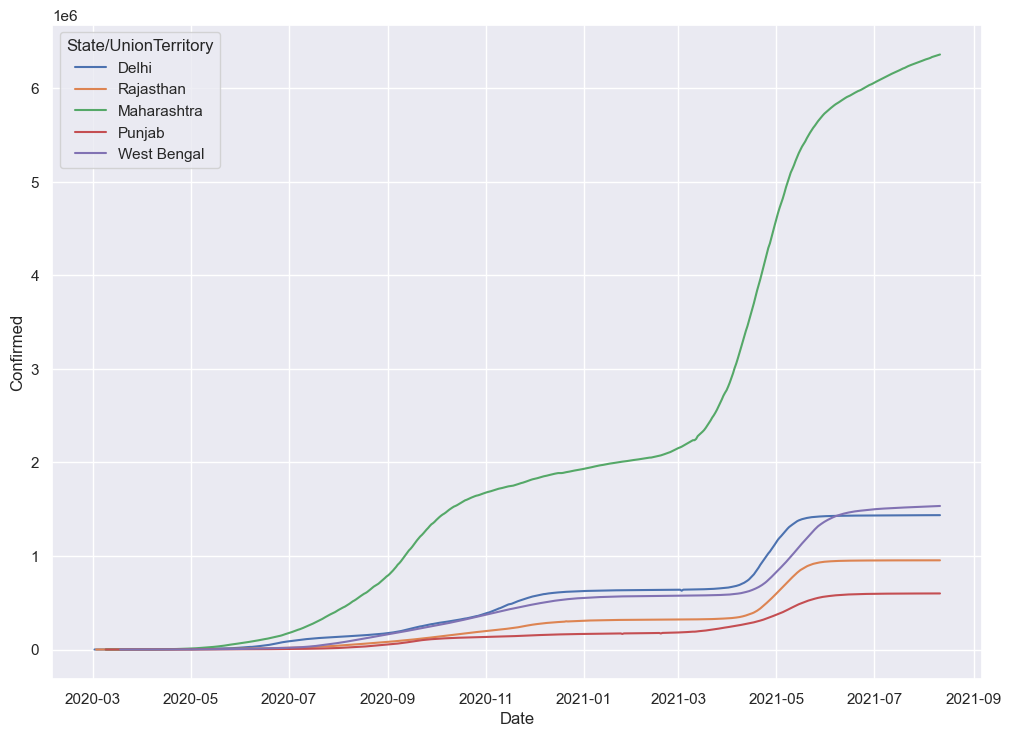

In [7]:
sns.lineplot(x="Date",y="Confirmed",data=dt2,hue="State/UnionTerritory")

<Axes: xlabel='Date', ylabel='Deaths'>

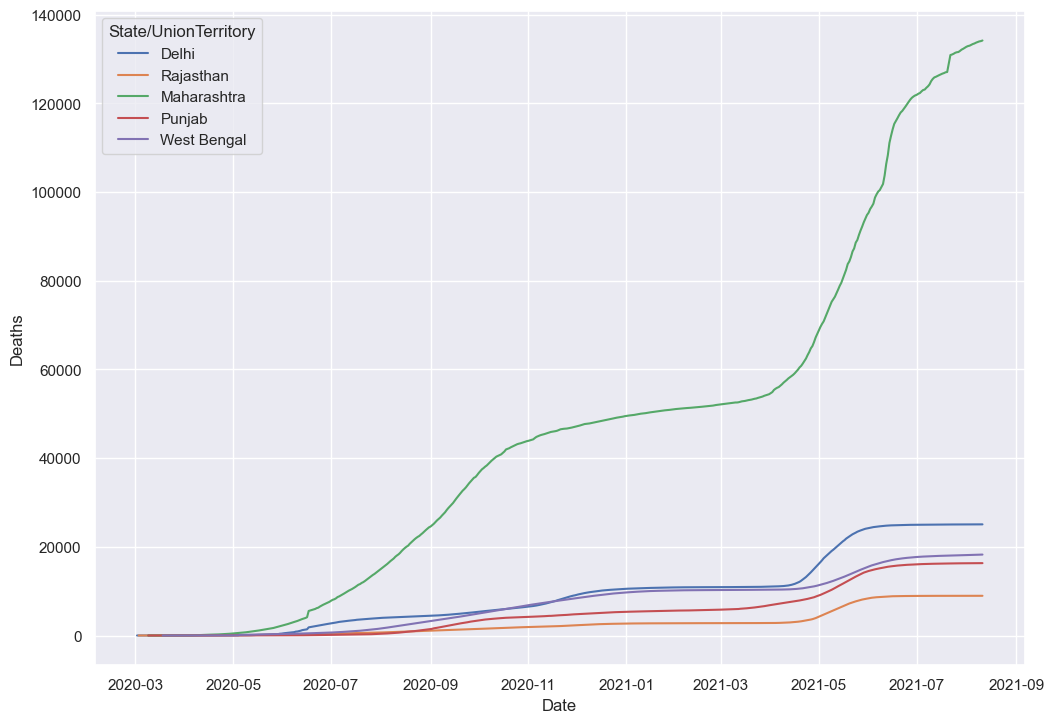

In [48]:
sns.lineplot(x="Date",y="Deaths",data=dt2,hue="State/UnionTerritory")

In [43]:
dt2

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year
34,35,2020-03-02,6:00 PM,Delhi,1,0,0,0,1,2020
36,37,2020-03-03,6:00 PM,Rajasthan,0,1,0,0,1,2020
38,39,2020-03-03,6:00 PM,Delhi,1,0,0,0,1,2020
42,43,2020-03-04,6:00 PM,Delhi,1,0,0,0,1,2020
44,45,2020-03-04,6:00 PM,Rajasthan,1,14,0,0,15,2020
...,...,...,...,...,...,...,...,...,...,...
18082,18083,2021-08-11,8:00 AM,Delhi,-,-,1411280,25068,1436852,2021
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442,2021
18101,18102,2021-08-11,8:00 AM,Punjab,-,-,582791,16322,599573,2021
18102,18103,2021-08-11,8:00 AM,Rajasthan,-,-,944700,8954,953851,2021


# Confirm to death ratio

In [4]:
def death_ratio(state):
    last_value = dataset.loc[dataset['State/UnionTerritory']==state].iloc[-1]
    d_all = last_value['Deaths']
    c_all = last_value['Confirmed']
    r_all = d_all / c_all
    return r_all

In [5]:
def cure_ratio(state):
    last_value = dataset.loc[dataset['State/UnionTerritory']==state].iloc[-1]
    c_all = last_value['Cured']
    cn_all = last_value['Confirmed']
    r_all = c_all / cn_all
    return r_all

In [7]:

df1 = pd.DataFrame({"State":[],"Death_confirm_ratio":[]})
states = dataset['State/UnionTerritory'].unique()
for x in states:
    d_ratio = death_ratio(x)
    df2=pd.DataFrame({"State":[x],"Death_confirm_ratio":[d_ratio]})
    df1 = pd.concat([df1, df2], ignore_index=True)
df1.sort_values(by="Death_confirm_ratio",ascending=True)

,State,Death_confirm_ratio
27,Unassigned,0.000000
35,Cases being reassigned to states,0.000000
37,Daman & Diu,0.000000
34,Dadra and Nagar Haveli and Daman and Diu,0.000375
40,Dadra and Nagar Haveli,0.000385
24,Mizoram,0.003692
30,Arunachal Pradesh,0.004901
38,Lakshadweep,0.004969
0,Kerala,0.005020
1,Telengana,0.005215


In [8]:
df1 = pd.DataFrame({"State":[],"Cure_confirm_ratio":[]})
states = dataset['State/UnionTerritory'].unique()
for x in states:
    d_ratio = cure_ratio(x)
    df2=pd.DataFrame({"State":[x],"Cure_confirm_ratio":[d_ratio]})
    df1 = pd.concat([df1, df2], ignore_index=True)
df1.sort_values(by="Cure_confirm_ratio",ascending=False)

,State,Cure_confirm_ratio
34,Dadra and Nagar Haveli and Daman and Diu,0.999249
38,Lakshadweep,0.990451
3,Rajasthan,0.990406
40,Dadra and Nagar Haveli,0.988821
19,Gujarat,0.987537
5,Haryana,0.986594
21,Madhya Pradesh,0.986553
18,Chandigarh,0.986418
4,Uttar Pradesh,0.986353
22,Bihar,0.986313


# Conclusion:

Mizoram has the lowest death to confirm ratio means least percentage of people died in Mizoram outof total number of people who were confirmed COVID positive as compared to other states.\
Also, Rajasthan has highest cured to confirm ratio of COVID 19 means highest percentage of people were recovered in Rajasthan among all the states./
It is also clear frm the data tha Maharastra has the highest number of confirmed cases of COVID 19.